In [9]:
%pip install pgmpy

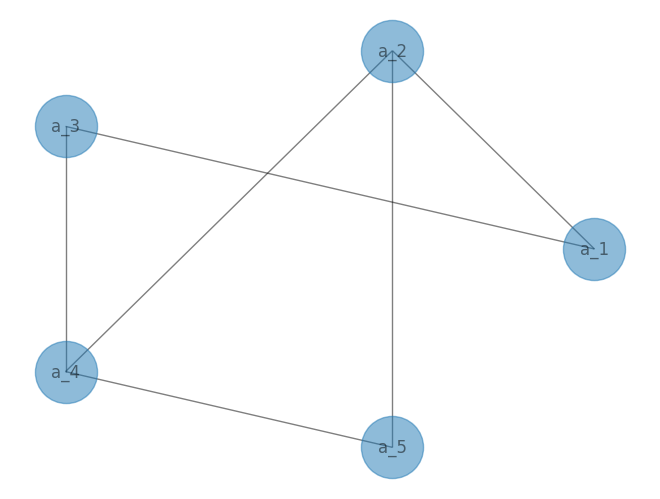

In [10]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import networkx as nx
import numpy as np

g = MarkovNetwork()

g.add_nodes_from(['a_1', 'a_2', 'a_3', 'a_4', 'a_5'])
g.add_edges_from([ ('a_1', 'a_2'), ('a_1', 'a_3'), ('a_2', 'a_4'), ('a_2', 'a_5'), ('a_3', 'a_4'),  ('a_4', 'a_5')])

pos = nx.circular_layout(g)
nx.draw(g, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

Clicile sunt (2, 4, 5), (1, 3), (1 ,2), (2, 4), (2, 5), (4, 5)

In [13]:
pairwise_potential = np.array([[np.exp(1*v1+ 2*v2)  for v2 in range(2)] for v1 in range(2)])
factor = DiscreteFactor(variables=['a_1', 'a_2'], cardinality=[2, 2], values = pairwise_potential.flatten())
g.add_factors(factor)

pairwise_potential = np.array([[np.exp(1*v1 + 3*v2)  for v2 in range(2)] for v1 in range(2)])
factor = DiscreteFactor(variables=['a_1', 'a_3'], cardinality=[2, 2], values = pairwise_potential.flatten())
g.add_factors(factor)

pairwise_potential = np.array([[np.exp(3*v1 + 4*v2)  for v2 in range(2)] for v1 in range(2)])
factor = DiscreteFactor(variables=['a_3', 'a_4'], cardinality=[2, 2], values = pairwise_potential.flatten())
g.add_factors(factor)

pairwise_potential = np.array([[[np.exp(2*v1 + 4*v2 + 5*v3)  for v2 in range(2)] for v1 in range(2)] for v3 in range(2)])
factor = DiscreteFactor(variables=['a_2', 'a_4', 'a_5'], cardinality=[2, 2, 2], values = pairwise_potential.flatten())
g.add_factors(factor)

bp = BeliefPropagation(g)
values = bp.map_query(variables=['a_1', 'a_2', 'a_3', 'a_4', 'a_5'])
ans = bp.query(variables=['a_1', 'a_2', 'a_3', 'a_4', 'a_5'])

print(values)
print(ans)

{'a_1': 1, 'a_2': 1, 'a_3': 1, 'a_4': 1, 'a_5': 1}
+--------+--------+--------+--------+--------+----------------------------+
| a_1    | a_2    | a_3    | a_4    | a_5    |   phi(a_1,a_2,a_3,a_4,a_5) |
+========+========+========+========+========+============================+
| a_1(0) | a_2(0) | a_3(0) | a_4(0) | a_5(0) |                     0.0000 |
+--------+--------+--------+--------+--------+----------------------------+
| a_1(0) | a_2(0) | a_3(0) | a_4(0) | a_5(1) |                     0.0000 |
+--------+--------+--------+--------+--------+----------------------------+
| a_1(0) | a_2(0) | a_3(0) | a_4(1) | a_5(0) |                     0.0000 |
+--------+--------+--------+--------+--------+----------------------------+
| a_1(0) | a_2(0) | a_3(0) | a_4(1) | a_5(1) |                     0.0000 |
+--------+--------+--------+--------+--------+----------------------------+
| a_1(0) | a_2(0) | a_3(1) | a_4(0) | a_5(0) |                     0.0000 |
+--------+--------+--------+--------+